<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import numpy as np
from sklearn import preprocessing
import pandas as pd

In [2]:
# Train Test Split
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2,seed=42,path='boston_housing.npz')

In [3]:
# Normalize data
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [4]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [5]:
model = Sequential()
# Input ==> Hidden
model.add(Dense(13, input_shape=(13,), activation='sigmoid'))
# Hidden
model.add(Dense(13, activation='tanh'))
# Output Layer
model.add(Dense(1))

model.compile(loss='mse',
                    optimizer='adam', 
                    metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train,y_train, epochs=1000,batch_size=32,verbose=0,validation_split=.1)

In [7]:
scores = model.evaluate(x_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [8]:
print(f'MSE is : {scores[1]}')

MSE is : 28.666362762451172


In [9]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_keras_api_names',
 '_keras_api_names_v1',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [10]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [11]:
type(history.model)

tensorflow.python.keras.engine.sequential.Sequential

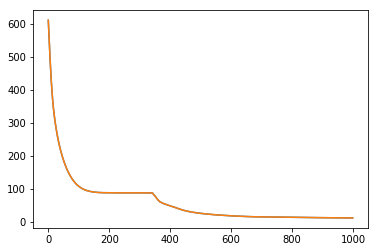

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.plot(history.history['mse'])

#plt.plot(history.history['val_loss'])

#plt.plot(history.history['val_mse'])

plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

64.04506798078461

Feature Engg

In [17]:
from sklearn.datasets import load_boston
bos = load_boston()

In [18]:
df = pd.DataFrame(bos.data,columns=bos.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
print(bos.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
df['MEDV'] = bos.target

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [22]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [23]:
(x_train_fm, y_train_fm), (x_test_fm, y_test_fm) = fashion_mnist.load_data()

In [24]:
print(x_train_fm)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [25]:
len(x_train_fm)

60000

In [26]:
print("x_train shape:", x_train_fm.shape, "y_train shape:", y_train_fm.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [27]:
#https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles 

num_classes = 10 # see above

In [28]:
#need to reshape the vectors into 1 dimensional arrays from 28x28 dimensional images
x_train_fm = x_train_fm.reshape(60000, 784)
x_test_fm = x_test_fm.reshape(10000, 784)

# Change dtypes to force floats
x_train_fm = x_train_fm.astype('float32')
x_test_fm = x_test_fm.astype('float32')

# encode target to a categorical
y_train_fm = to_categorical(y_train_fm, num_classes)
y_test_fm = to_categorical(y_test_fm, num_classes)

In [30]:
# Normalize data
x_train_fm = x_train_fm / 255
x_test_fm = x_test_fm / 255

In [32]:
mnist_model = Sequential()
mnist_model.add(Dense(16, input_dim=784, activation='relu', name='input_layer'))
mnist_model.add(Dense(16, activation='relu', name="hidden_layer"))
mnist_model.add(Dense(10,activation='softmax',name="output_layer"))
mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 16)                12560     
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = mnist_model.fit(x_train_fm, y_train_fm, batch_size=64, epochs=10, verbose=0)
scores = mnist_model.evaluate(x_test_fm, y_test_fm)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy: 86.04000210762024


In [34]:
mnist_model_sig = Sequential()
mnist_model_sig.add(Dense(16, input_dim=784, activation='sigmoid', name='input_layer'))
mnist_model_sig.add(Dense(16, activation='sigmoid', name="hidden_layer"))
mnist_model_sig.add(Dense(10,activation='softmax',name="output_layer"))
mnist_model_sig.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
mnist_model_sig.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 16)                12560     
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = mnist_model_sig.fit(x_train_fm, y_train_fm, batch_size=64, epochs=10, verbose=0)
scores = mnist_model_sig.evaluate(x_test_fm, y_test_fm)
print(f'{mnist_model_sig.metrics_names[1]}: {scores[1]*100}')

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy: 85.61000227928162


In [36]:
mnist_model_tan = Sequential()
mnist_model_tan.add(Dense(16, input_dim=784, activation='tanh', name='input_layer'))
mnist_model_tan.add(Dense(16, activation='tanh', name="hidden_layer"))
mnist_model_tan.add(Dense(10,activation='softmax',name="output_layer"))
mnist_model_tan.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
mnist_model_tan.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 16)                12560     
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = mnist_model_tan.fit(x_train_fm, y_train_fm, batch_size=64, epochs=10, verbose=0)
scores = mnist_model_tan.evaluate(x_test_fm, y_test_fm)
print(f'{mnist_model_tan.metrics_names[1]}: {scores[1]*100}')

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy: 85.53000092506409


In [38]:
mnist_model_hybrid = Sequential()
mnist_model_hybrid.add(Dense(16, input_dim=784, activation='relu', name='input_layer'))
mnist_model_hybrid.add(Dense(16, activation='tanh', name="hidden_layer"))
mnist_model_hybrid.add(Dense(10,activation='softmax',name="output_layer"))
mnist_model_hybrid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
mnist_model_hybrid.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 16)                12560     
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = mnist_model_hybrid.fit(x_train_fm, y_train_fm, batch_size=64, epochs=10, verbose=0)
scores = mnist_model_hybrid.evaluate(x_test_fm, y_test_fm)
print(f'{mnist_model_hybrid.metrics_names[1]}: {scores[1]*100}')

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy: 85.29999852180481


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.